<a href="https://colab.research.google.com/github/sonalgan/Bhaashaa/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('/content/Health Survey 2021 (Responses) - Form Responses 1.csv')

In [4]:
df=df[df['Informed Consent']=='Yes']
df=df.drop(columns=['Informed Consent','Email Address'])


In [5]:
df.shape

(160, 56)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 162
Data columns (total 56 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Timestamp                                            160 non-null    object 
 1   Finding survey                                       159 non-null    object 
 2   State/UT                                             160 non-null    object 
 3   Area                                                 159 non-null    object 
 4   Age                                                  160 non-null    object 
 5   Gender                                               160 non-null    object 
 6   Level of Education                                   160 non-null    object 
 7   Marital Status                                       160 non-null    object 
 8   Current Employment Status                            160 non-null    o

In [7]:
depression_choices=['Not at all',
'Just a little',
'Somewhat',
'Moderately',
'Quite a lot',
'Very much']
depressiontest_columns=[]
for i in df.columns[15:15+18]:
  depressiontest_columns.append(i)

In [8]:
depressiontest_columns

['Depression Test - Q1',
 'Depression Test - Q2',
 'Depression Test - Q3',
 'Depression Test - Q4',
 'Depression Test - Q5',
 'Depression Test - Q6',
 'Depression Test - Q7',
 'Depression Test - Q8',
 'Depression Test - Q9',
 'Depression Test - Q10',
 'Depression Test - Q11',
 'Depression Test - Q12',
 'Depression Test - Q13',
 'Depression Test - Q14',
 'Depression Test - Q15',
 'Depression Test - Q16',
 'Depression Test - Q17',
 'Depression Test - Q18']

In [9]:
for i in depressiontest_columns:
  for j in range(len(depression_choices)):
    df.loc[df[i]==depression_choices[j],i]=j

In [10]:
depression_scores=[]
for i in range(len(df)):
  score=0
  for j in depressiontest_columns:
    score+=df[j].iloc[i]
  depression_scores.append(score)
df=df.assign(DepressionScale=depression_scores)
df=df.drop(columns=depressiontest_columns)


In [11]:
df.describe()

,No. of Family Members,Inclinination towards exercise per week,Difficulty level to manage daily/household expenses,Affect of Covid on Daily Schedule,DepressionScale
count,160.000000,160.000000,155.000000,160.000000,160.000000
mean,3.956250,2.625000,2.580645,2.325000,25.737500
std,1.770999,1.469822,1.167031,1.403276,21.961226
min,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,2.000000,1.000000,8.000000
50%,4.000000,2.000000,3.000000,2.000000,18.500000
75%,4.250000,4.000000,3.000000,3.000000,37.250000
max,9.000000,5.000000,5.000000,5.000000,90.000000


In [240]:
df.DepressionScale.unique()

array([17,  8, 29, 23, 18, 22,  0,  1,  3,  6, 81, 13,  9, 14,  4, 30, 35,
       25, 48, 39,  5, 61, 37, 15, 56, 73, 40, 34, 20, 11, 47, 16, 50, 32,
       26, 51,  2, 66, 36, 62, 10, 24, 41, 63, 72, 27, 90, 42, 58, 67, 55,
        7, 69, 19, 64, 43, 75, 86, 21, 60, 57, 38])

In [241]:
df.DepressionScale.value_counts()

0     10
8      8
4      7
5      7
17     7
      ..
86     1
48     1
38     1
41     1
90     1
Name: DepressionScale, Length: 62, dtype: int64

In [242]:
df.corr()

,No. of Family Members,Inclinination towards exercise per week,Difficulty level to manage daily/household expenses,Affect of Covid on Daily Schedule,DepressionScale
No. of Family Members,1.000000,-0.102987,0.001000,-0.004365,0.099152
Inclinination towards exercise per week,-0.102987,1.000000,0.024290,0.166185,-0.229864
Difficulty level to manage daily/household expenses,0.001000,0.024290,1.000000,-0.096808,0.406507
Affect of Covid on Daily Schedule,-0.004365,0.166185,-0.096808,1.000000,-0.164357
DepressionScale,0.099152,-0.229864,0.406507,-0.164357,1.000000


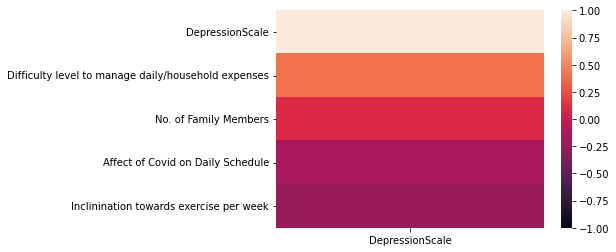

In [243]:
sns.heatmap(df.corr()[['DepressionScale']].sort_values(by='DepressionScale', ascending=False),vmin=-1,vmax=1)
plt.show()

In [153]:
df.isna().sum()


Timestamp                                                0
Informed Consent                                         0
Finding survey                                           0
State/UT                                                 0
Area                                                     0
Age                                                      0
Gender                                                   0
Level of Education                                       0
Marital Status                                           0
Current Employment Status                                0
Occupation                                               0
Household Income                                         0
No. of Family Members                                    0
Covid Diagnosed(Self)                                    0
Covid Diagnosed(Family)                                  0
Death in Family/Friends(due to Covid)                    0
Additional Diseases                                    1

In [12]:
df=df.drop(index=0)

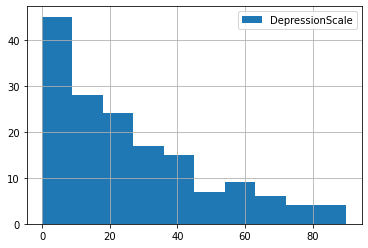

In [245]:
df['DepressionScale'].hist(legend=True)


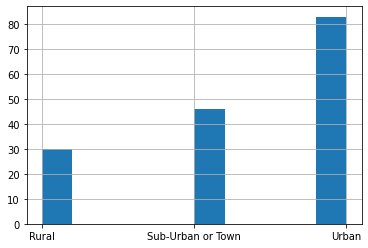

In [246]:
df['Area'].hist()

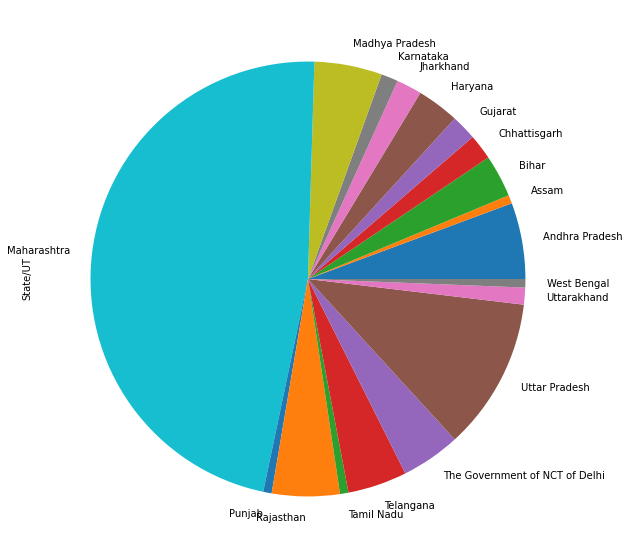

In [247]:

df.groupby('State/UT')['State/UT'].count().plot.pie(figsize=[10,10])

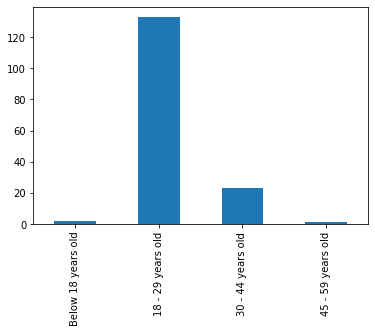

In [255]:
df.Age.value_counts().loc[['Below 18 years old','18 - 29 years old', '30 - 44 years old', '45 - 59 years old']].plot.bar()

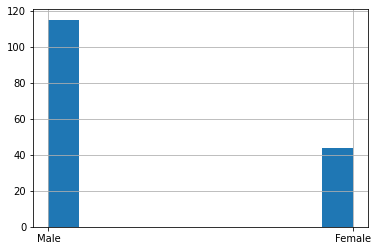

In [256]:
df['Gender'].hist()

In [259]:
df['Level of Education'].value_counts()

12th Grade or SSC                  75
Bachelor’s degree                  58
Master’s degree                    15
PhD                                10
Diploma in computer technology      1
Name: Level of Education, dtype: int64

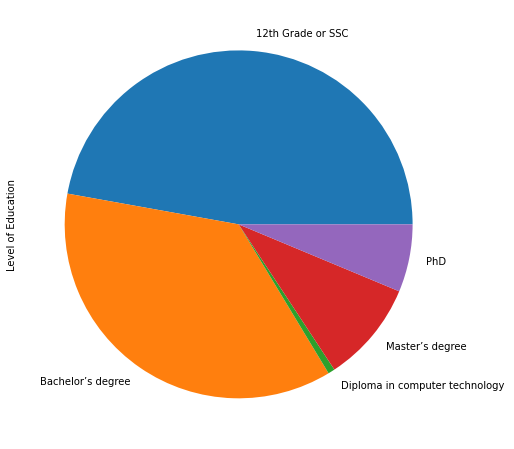

In [258]:
df.groupby('Level of Education')['Level of Education'].count().plot.pie(figsize=[8,8])

In [261]:
df['Marital Status'].value_counts()

Single               132
Married               24
In a Relationship      2
Never married          1
Name: Marital Status, dtype: int64

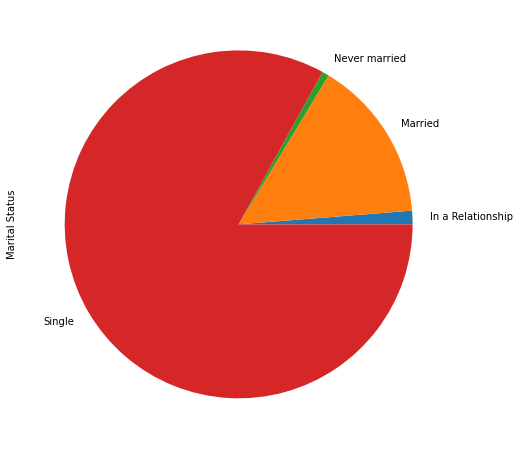

In [260]:
df.groupby('Marital Status')['Marital Status'].count().plot.pie(figsize=[8,8])

In [265]:
df['Current Employment Status'].value_counts()

Student                 103
Full-time employment     40
Unemployed                7
Part-time employment      6
Self-employed             3
Name: Current Employment Status, dtype: int64

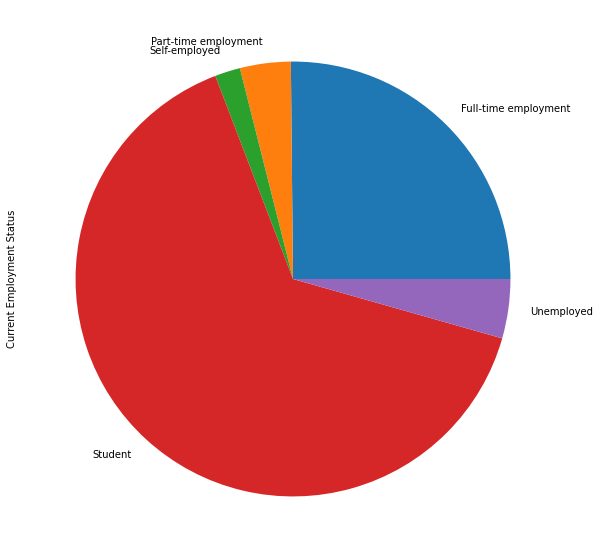

In [263]:
df.groupby('Current Employment Status')['Current Employment Status'].count().plot.pie(figsize=[10,10])

In [268]:
df['Occupation'].value_counts()

Computer and Mathematical                 64
Education, Training and Library Arts      37
Architecture and Engineering              18
Student                                   12
Buisness and Financial Operations          7
None                                       2
Office and Adminstratie Support            2
Arts/Design/Entertainment/Sports/Media     2
Engineering student                        1
Student                                    1
Study                                      1
Farming, Fishing and Forestry              1
Computer Science Engineering Student       1
Engineering                                1
Legal Occupations                          1
Iam an undergraduate student               1
Construction and Extractionion             1
Data Science & Engineering                 1
Unemployed                                 1
VLSI                                       1
Trading                                    1
student                                    1
I am curre

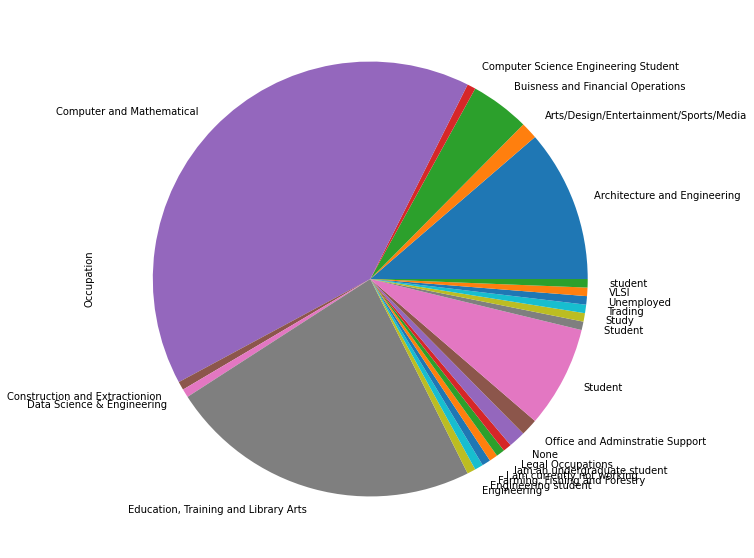

In [266]:
df.groupby('Occupation')['Occupation'].count().plot.pie(figsize=[10,10])

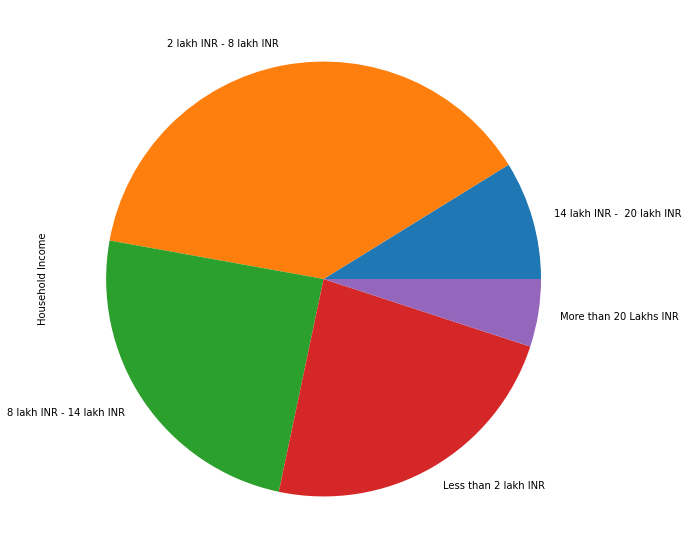

In [269]:
df.groupby('Household Income')['Household Income'].count().plot.pie(figsize=[10,10])

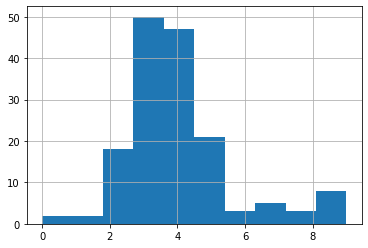

In [272]:
df['No. of Family Members'].hist()

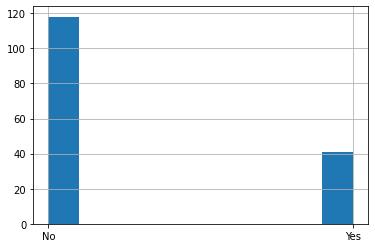

In [273]:
df['Covid Diagnosed(Self)'].hist()

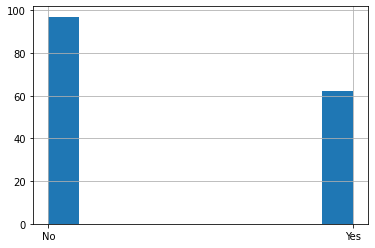

In [275]:
df['Covid Diagnosed(Family)'].hist()

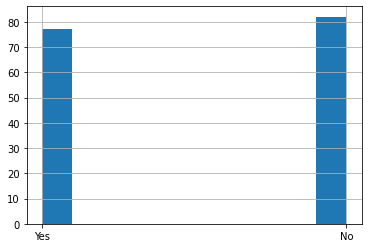

In [276]:
df['Death in Family/Friends(due to Covid)'].hist()

In [26]:
df.Age.unique()

array(['18 - 29 years old', '30 - 44 years old', 'Below 18 years old',
       '45 - 59 years old'], dtype=object)

In [16]:
 df.loc[df['Additional Diseases']==np.nan,'Additional Diseases']='None'

In [24]:
df['Additional Diseases'] = df['Additional Diseases'].replace(np.nan, 'None')

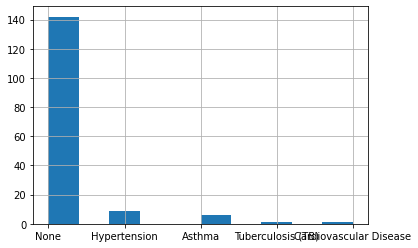

In [29]:
df['Additional Diseases'].hist()

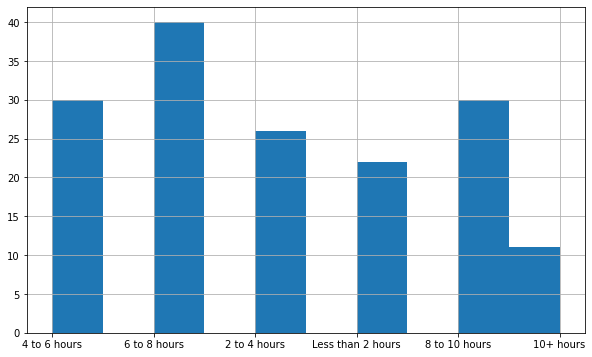

In [34]:
df['No. of hours in work/study per day'].hist(figsize=(10,6))

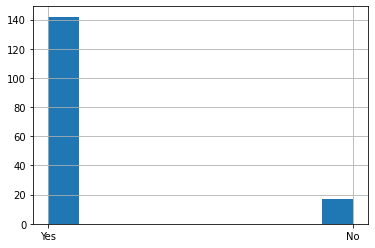

In [35]:
df['Work/Study (Online)'].hist()

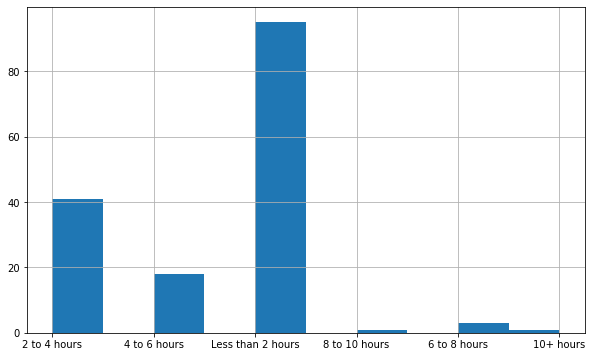

In [37]:
df['No. of hours in household chores per day'].hist(figsize=(10,6))

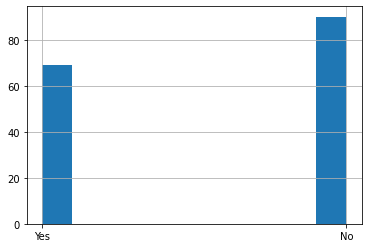

In [38]:
df['Househelp Workers'].hist()

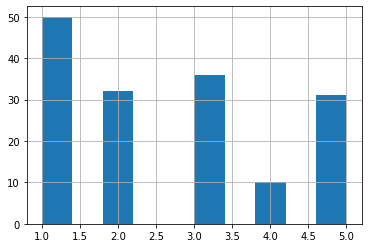

In [39]:
df['Inclinination towards exercise per week'].hist()

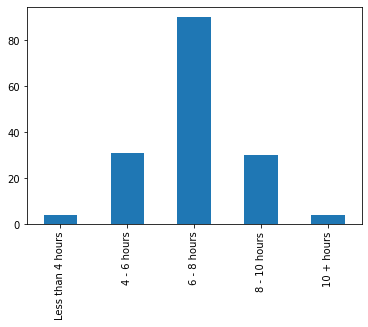

In [41]:
df['No. of hours of sleep per day'].value_counts().loc[['Less than 4 hours','4 - 6 hours', '6 - 8 hours', '8 - 10 hours','10 + hours']].plot.bar()

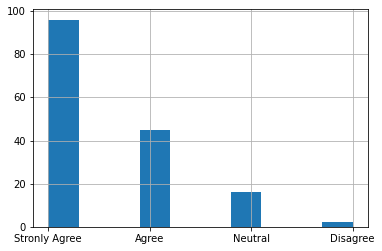

In [42]:
df['Nutrition - Homecooked Meals'].hist()

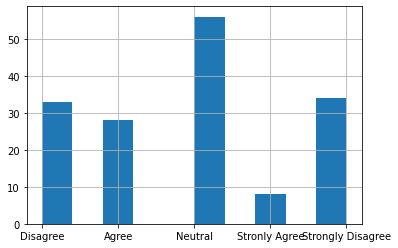

In [43]:
df['Nutrition - Ordered Food'].hist()

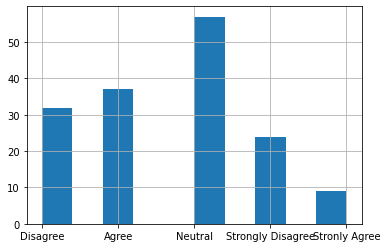

In [44]:
df['Nutrition - Processed Snacks'].hist()

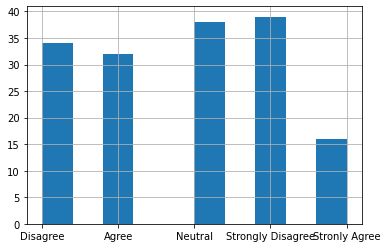

In [45]:
df['Nutrition - Medication'].hist()

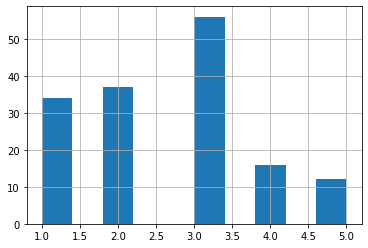

In [46]:
df['Difficulty level to manage daily/household expenses'].hist()

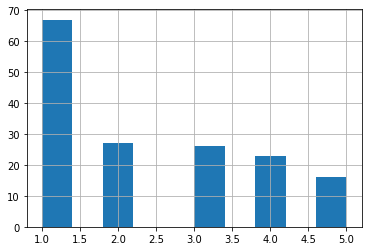

In [47]:
df['Affect of Covid on Daily Schedule'].hist()

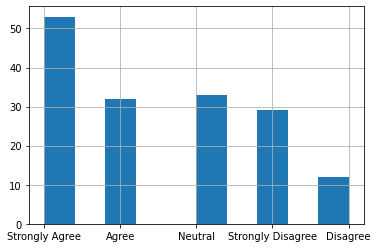

In [53]:
df['Mental Health Talk - Partner'].hist()


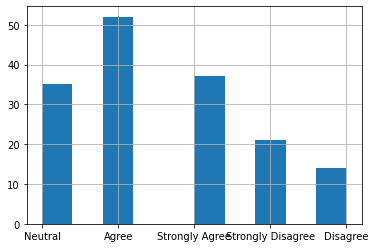

In [52]:
df['Mental Health Talk - Family Member'].hist()

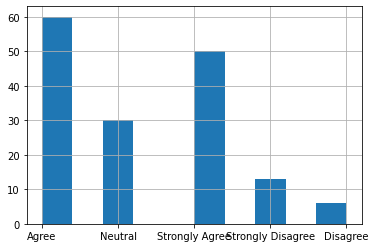

In [51]:
df['Mental Health Talk - Friend'].hist()


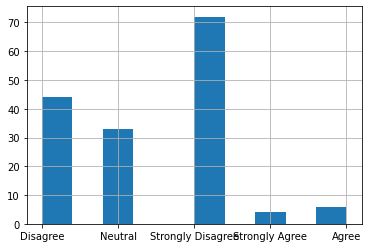

In [50]:
df['Mental Health Talk - Neighbour'].hist()

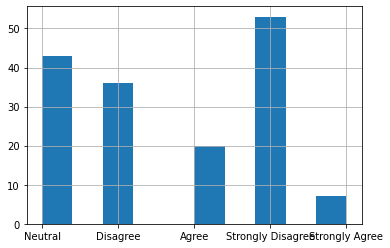

In [49]:
df['Mental Health Talk - Co-worker'].hist()

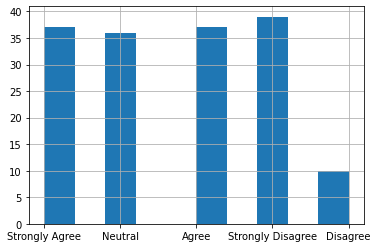

In [48]:
df['Mental Health Talk - Therapist'].hist()

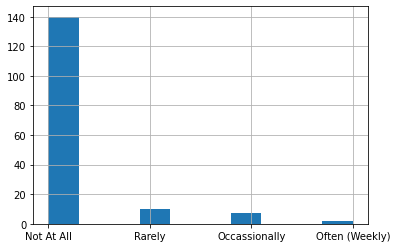

In [56]:
df['Inclination to Substance Abuse - Alcohol'].hist()

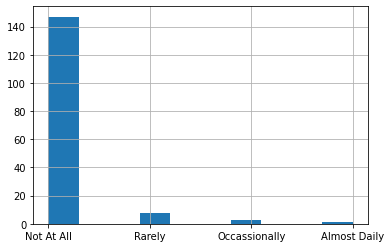

In [55]:
df['Inclination to Substance Abuse - Smoking'].hist()

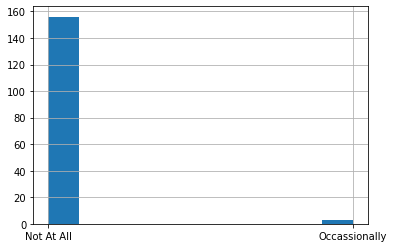

In [54]:
df['Inclination to Substance Abuse - Tobacco'].hist()

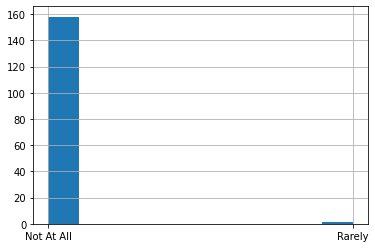

In [57]:
df['Inclination to Substance Abuse - Drugs'].hist()

In [144]:
df.describe()

,No. of Family Members,Inclinination towards exercise per week,Difficulty level to manage daily/household expenses,Affect of Covid on Daily Schedule,DepressionScale
count,160.000000,160.000000,155.000000,160.000000,160.000000
mean,3.956250,2.625000,2.580645,2.325000,25.737500
std,1.770999,1.469822,1.167031,1.403276,21.961226
min,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,2.000000,1.000000,8.000000
50%,4.000000,2.000000,3.000000,2.000000,18.500000
75%,4.250000,4.000000,3.000000,3.000000,37.250000
max,9.000000,5.000000,5.000000,5.000000,90.000000


In [25]:
df.head()

,Timestamp,Finding survey,State/UT,Area,Age,Gender,Level of Education,Marital Status,Current Employment Status,Occupation,Household Income,No. of Family Members,Covid Diagnosed(Self),Covid Diagnosed(Family),Death in Family/Friends(due to Covid),Additional Diseases,Work/Study (Online),No. of hours in work/study per day,No. of hours in household chores per day,Househelp Workers,Inclinination towards exercise per week,No. of hours of sleep per day,Nutrition - Homecooked Meals,Nutrition - Ordered Food,Nutrition - Processed Snacks,Nutrition - Medication,Difficulty level to manage daily/household expenses,Affect of Covid on Daily Schedule,Mental Health Talk - Partner,Mental Health Talk - Family Member,Mental Health Talk - Friend,Mental Health Talk - Neighbour,Mental Health Talk - Co-worker,Mental Health Talk - Therapist,Inclination to Substance Abuse - Alcohol,Inclination to Substance Abuse - Smoking,Inclination to Substance Abuse - Tobacco,Inclination to Substance Abuse - Drugs,DepressionScale
1,9/8/2021 0:16:04,Linkedin,Chhattisgarh,Rural,18 - 29 years old,Male,12th Grade or SSC,Single,Student,Engineering,Less than 2 lakh INR,9.0,No,No,Yes,None,Yes,4 to 6 hours,2 to 4 hours,Yes,5.0,6 - 8 hours,Stronly Agree,Disagree,Disagree,Disagree,3.0,3.0,Strongly Agree,Neutral,Agree,Disagree,Neutral,Strongly Agree,Not At All,Not At All,Not At All,Not At All,8
2,9/8/2021 1:11:11,Linkedin,Maharashtra,Rural,18 - 29 years old,Female,Bachelor’s degree,Single,Full-time employment,Buisness and Financial Operations,14 lakh INR - 20 lakh INR,9.0,No,Yes,Yes,None,Yes,6 to 8 hours,4 to 6 hours,Yes,3.0,6 - 8 hours,Agree,Agree,Agree,Agree,4.0,3.0,Agree,Agree,Agree,Disagree,Disagree,Neutral,Not At All,Not At All,Not At All,Not At All,29
3,9/8/2021 3:38:55,Linkedin,Madhya Pradesh,Sub-Urban or Town,18 - 29 years old,Male,Bachelor’s degree,Single,Full-time employment,Data Science & Engineering,8 lakh INR - 14 lakh INR,4.0,No,No,No,None,Yes,2 to 4 hours,Less than 2 hours,No,1.0,8 - 10 hours,Neutral,Neutral,Disagree,Neutral,2.0,5.0,Neutral,Strongly Agree,Neutral,Neutral,Neutral,Neutral,Rarely,Not At All,Not At All,Not At All,23
4,9/8/2021 5:30:15,Linkedin,Maharashtra,Urban,30 - 44 years old,Female,Master’s degree,Married,Full-time employment,Architecture and Engineering,2 lakh INR - 8 lakh INR,5.0,Yes,Yes,No,Hypertension,No,4 to 6 hours,4 to 6 hours,Yes,1.0,6 - 8 hours,Agree,Neutral,Disagree,Agree,1.0,1.0,Strongly Agree,Agree,Strongly Agree,Neutral,Agree,Agree,Not At All,Not At All,Not At All,Not At All,8
5,9/8/2021 21:48:48,Whatsapp,Uttar Pradesh,Urban,18 - 29 years old,Male,12th Grade or SSC,Single,Student,Computer and Mathematical,2 lakh INR - 8 lakh INR,4.0,No,Yes,No,None,Yes,Less than 2 hours,2 to 4 hours,Yes,2.0,6 - 8 hours,Agree,Disagree,Disagree,Disagree,1.0,2.0,Agree,Agree,Agree,Disagree,Disagree,Neutral,Not At All,Not At All,Not At All,Not At All,18
